In [2]:
import numpy as np

# Cargar los archivos .npy
X_trad = np.load('X_trad.npy')
image_ids = np.load('image_ids.npy', allow_pickle=True)

In [3]:
from sklearn.preprocessing import StandardScaler

# Aplicar StandardScaler a X_trad
scaler = StandardScaler()
X_trad = scaler.fit_transform(X_trad)


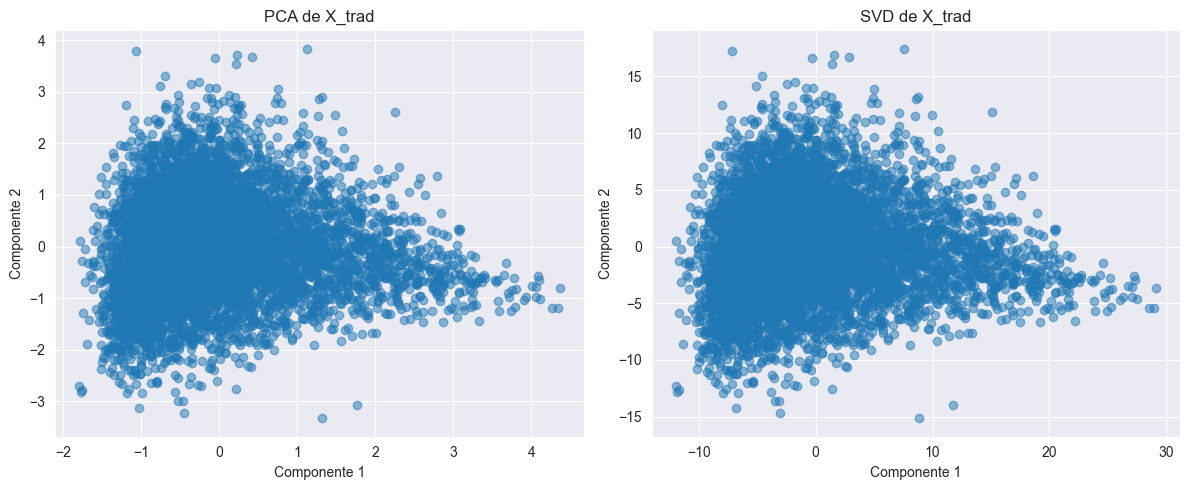

Varianza explicada PCA: [0.24598081 0.11419147 0.0765629  0.06246639 0.0443089  0.04159103
 0.03106877 0.02499675 0.02321455 0.02164531 0.01897233 0.018314
 0.01425656 0.01393489 0.01236113 0.01181376 0.01017115 0.00927462
 0.00830801 0.0074099  0.00709136 0.00693558 0.00635866 0.00625426
 0.00584876 0.0057566  0.00553646 0.00537222 0.0051012  0.00505106
 0.00490435 0.00481691 0.00441136 0.0042281  0.00402475 0.00390258
 0.0036377  0.00354119 0.00348919 0.00335759 0.00320915 0.00315379
 0.00310522 0.00298668 0.00294244 0.00286104 0.00275968 0.00260775
 0.0025716  0.0024307 ]
Varianza total explicada PCA: 0.9391

Varianza explicada SVD: [0.24598089 0.11419134 0.07656291 0.06246627 0.04430887 0.04159104
 0.03106871 0.02499678 0.02321455 0.02164532 0.01897232 0.01831402
 0.01425656 0.01393488 0.0123611  0.01181376 0.01017115 0.00927459
 0.00830802 0.00740989 0.00709136 0.00693557 0.00635867 0.00625425
 0.00584876 0.0057566  0.00553644 0.00537222 0.00510119 0.00505106
 0.00490434 0.0048168

In [4]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA(n_components=50, random_state=42, whiten=True)
X_pca = pca.fit_transform(X_trad)

# Aplicar SVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X_trad)

# Visualizar resultados (primeros 2 componentes)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA de X_trad')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.subplot(1, 2, 2)
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.5)
plt.title('SVD de X_trad')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.tight_layout()
plt.show()

print(f"Varianza explicada PCA: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada PCA: {pca.explained_variance_ratio_.sum():.4f}")
print(f"\nVarianza explicada SVD: {svd.explained_variance_ratio_}")
print(f"Varianza total explicada SVD: {svd.explained_variance_ratio_.sum():.4f}")


C:\Users\eduar\PycharmProjects\MLproject2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\eduar\PycharmProjects\MLproject2\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\eduar\PycharmProjects\MLproject2\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


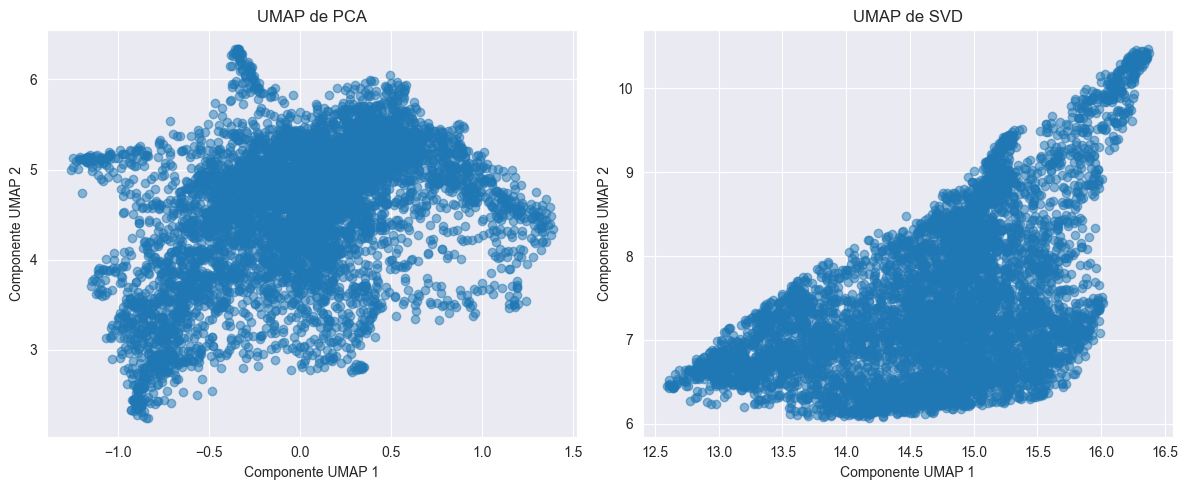

Forma de X_umap_pca: (6338, 10)
Forma de X_umap_svd: (6338, 10)


In [5]:
import umap
import matplotlib.pyplot as plt

# Aplicar UMAP a PCA
umap_pca = umap.UMAP(n_components=10, random_state=42, n_neighbors=15)
X_umap_pca = umap_pca.fit_transform(X_pca)

# Aplicar UMAP a SVD
umap_svd = umap.UMAP(n_components=10, random_state=42,n_neighbors=15)
X_umap_svd = umap_svd.fit_transform(X_svd)

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], alpha=0.5)
plt.title('UMAP de PCA')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')

plt.subplot(1, 2, 2)
plt.scatter(X_umap_svd[:, 0], X_umap_svd[:, 1], alpha=0.5)
plt.title('UMAP de SVD')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')

plt.tight_layout()
plt.show()

print(f"Forma de X_umap_pca: {X_umap_pca.shape}")
print(f"Forma de X_umap_svd: {X_umap_svd.shape}")


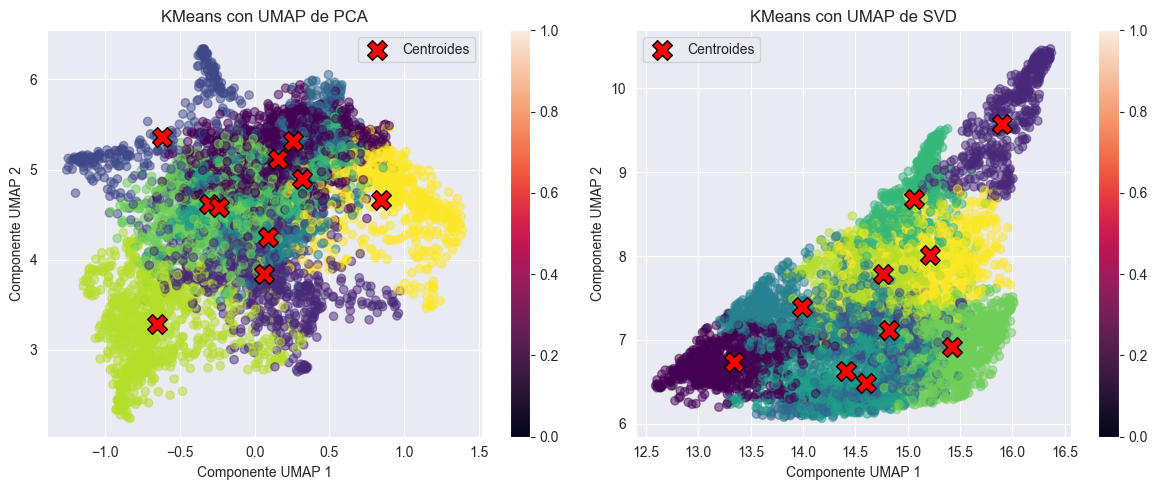

KMeans (UMAP de PCA) - Inercia: 5494.21
KMeans (UMAP de PCA) - Coeficiente de Silhouette: 0.2562
KMeans (UMAP de SVD) - Inercia: 5225.18
KMeans (UMAP de SVD) - Coeficiente de Silhouette: 0.3079


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Aplicar KMeans a UMAP de PCA
kmeans_umap_pca = KMeans(n_clusters=10, random_state=42, n_init=10)
y_kmeans_umap_pca = kmeans_umap_pca.fit_predict(X_umap_pca)

# Aplicar KMeans a UMAP de SVD
kmeans_umap_svd = KMeans(n_clusters=10, random_state=42, n_init=10)
y_kmeans_umap_svd = kmeans_umap_svd.fit_predict(X_umap_svd)

# Calcular coeficiente de Silhouette
silhouette_umap_pca = silhouette_score(X_umap_pca, y_kmeans_umap_pca)
silhouette_umap_svd = silhouette_score(X_umap_svd, y_kmeans_umap_svd)

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=y_kmeans_umap_pca, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_umap_pca.cluster_centers_[:, 0], kmeans_umap_pca.cluster_centers_[:, 1],
            c='red', marker='X', s=200, edgecolors='black', label='Centroides')
plt.title('KMeans con UMAP de PCA')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_umap_svd[:, 0], X_umap_svd[:, 1], c=y_kmeans_umap_svd, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_umap_svd.cluster_centers_[:, 0], kmeans_umap_svd.cluster_centers_[:, 1],
            c='red', marker='X', s=200, edgecolors='black', label='Centroides')
plt.title('KMeans con UMAP de SVD')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()
plt.legend()

plt.tight_layout()
plt.show()

print(f"KMeans (UMAP de PCA) - Inercia: {kmeans_umap_pca.inertia_:.2f}")
print(f"KMeans (UMAP de PCA) - Coeficiente de Silhouette: {silhouette_umap_pca:.4f}")
print(f"KMeans (UMAP de SVD) - Inercia: {kmeans_umap_svd.inertia_:.2f}")
print(f"KMeans (UMAP de SVD) - Coeficiente de Silhouette: {silhouette_umap_svd:.4f}")


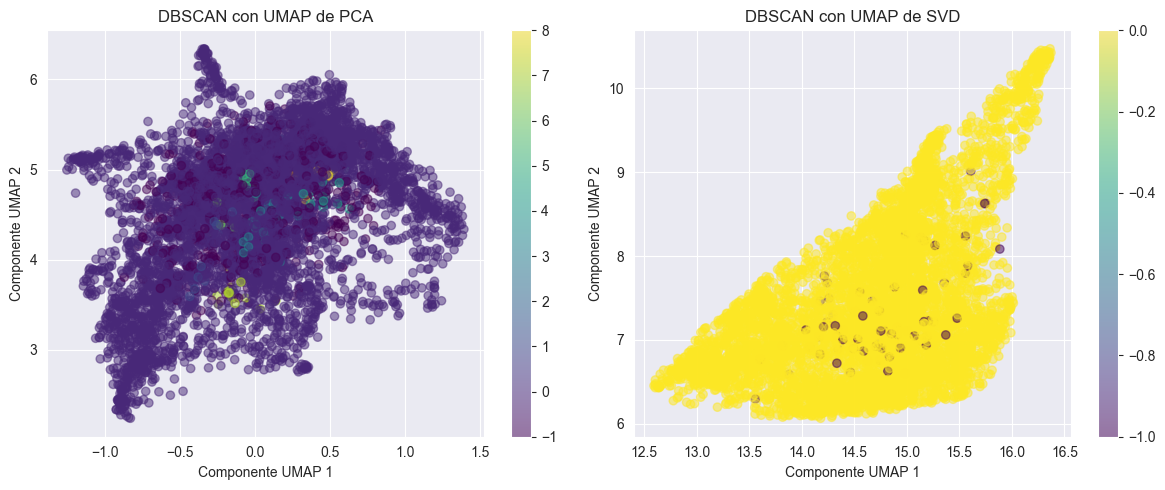

DBSCAN (UMAP de PCA) - Número de clusters: 9
DBSCAN (UMAP de PCA) - Puntos de ruido: 719
DBSCAN (UMAP de PCA) - Coeficiente de Silhouette: -0.3389

DBSCAN (UMAP de SVD) - Número de clusters: 1
DBSCAN (UMAP de SVD) - Puntos de ruido: 74
DBSCAN (UMAP de SVD) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)


In [7]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Aplicar DBSCAN a UMAP de PCA
dbscan_umap_pca = DBSCAN(eps=0.5, min_samples=10)
y_dbscan_umap_pca = dbscan_umap_pca.fit_predict(X_umap_pca)

# Aplicar DBSCAN a UMAP de SVD
dbscan_umap_svd = DBSCAN(eps=0.5, min_samples=10)
y_dbscan_umap_svd = dbscan_umap_svd.fit_predict(X_umap_svd)

# Calcular número de clusters y ruido
n_clusters_umap_pca = len(set(y_dbscan_umap_pca)) - (1 if -1 in y_dbscan_umap_pca else 0)
n_noise_umap_pca = list(y_dbscan_umap_pca).count(-1)

n_clusters_umap_svd = len(set(y_dbscan_umap_svd)) - (1 if -1 in y_dbscan_umap_svd else 0)
n_noise_umap_svd = list(y_dbscan_umap_svd).count(-1)

# Calcular coeficiente de Silhouette (solo si hay más de 1 cluster)
if n_clusters_umap_pca > 1:
    silhouette_dbscan_umap_pca = silhouette_score(X_umap_pca, y_dbscan_umap_pca)
else:
    silhouette_dbscan_umap_pca = None

if n_clusters_umap_svd > 1:
    silhouette_dbscan_umap_svd = silhouette_score(X_umap_svd, y_dbscan_umap_svd)
else:
    silhouette_dbscan_umap_svd = None

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=y_dbscan_umap_pca, cmap='viridis', alpha=0.5)
plt.title('DBSCAN con UMAP de PCA')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_umap_svd[:, 0], X_umap_svd[:, 1], c=y_dbscan_umap_svd, cmap='viridis', alpha=0.5)
plt.title('DBSCAN con UMAP de SVD')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"DBSCAN (UMAP de PCA) - Número de clusters: {n_clusters_umap_pca}")
print(f"DBSCAN (UMAP de PCA) - Puntos de ruido: {n_noise_umap_pca}")
if silhouette_dbscan_umap_pca is not None:
    print(f"DBSCAN (UMAP de PCA) - Coeficiente de Silhouette: {silhouette_dbscan_umap_pca:.4f}")
else:
    print("DBSCAN (UMAP de PCA) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)")

print(f"\nDBSCAN (UMAP de SVD) - Número de clusters: {n_clusters_umap_svd}")
print(f"DBSCAN (UMAP de SVD) - Puntos de ruido: {n_noise_umap_svd}")
if silhouette_dbscan_umap_svd is not None:
    print(f"DBSCAN (UMAP de SVD) - Coeficiente de Silhouette: {silhouette_dbscan_umap_svd:.4f}")
else:
    print("DBSCAN (UMAP de SVD) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)")



Complete (max link):
UMAP PCA - Número de clusters: 10
UMAP PCA - Coeficiente de Silhouette: 0.1828
UMAP PCA - Calinski-Harabasz: 1079.6409
UMAP PCA - Davies-Bouldin: 1.4664
UMAP SVD - Número de clusters: 10
UMAP SVD - Coeficiente de Silhouette: 0.2195
UMAP SVD - Calinski-Harabasz: 2420.6853
UMAP SVD - Davies-Bouldin: 1.1680

Single (min link):
UMAP PCA - Número de clusters: 10
UMAP PCA - Coeficiente de Silhouette: -0.3846
UMAP PCA - Calinski-Harabasz: 0.4834
UMAP PCA - Davies-Bouldin: 1.4734
UMAP SVD - Número de clusters: 10
UMAP SVD - Coeficiente de Silhouette: -0.4322
UMAP SVD - Calinski-Harabasz: 0.4168
UMAP SVD - Davies-Bouldin: 2.0674

Average link:
UMAP PCA - Número de clusters: 10
UMAP PCA - Coeficiente de Silhouette: 0.2188
UMAP PCA - Calinski-Harabasz: 1102.1167
UMAP PCA - Davies-Bouldin: 1.1751
UMAP SVD - Número de clusters: 10
UMAP SVD - Coeficiente de Silhouette: 0.2577
UMAP SVD - Calinski-Harabasz: 2611.1436
UMAP SVD - Davies-Bouldin: 1.2080

Weighted:
UMAP PCA - Número 

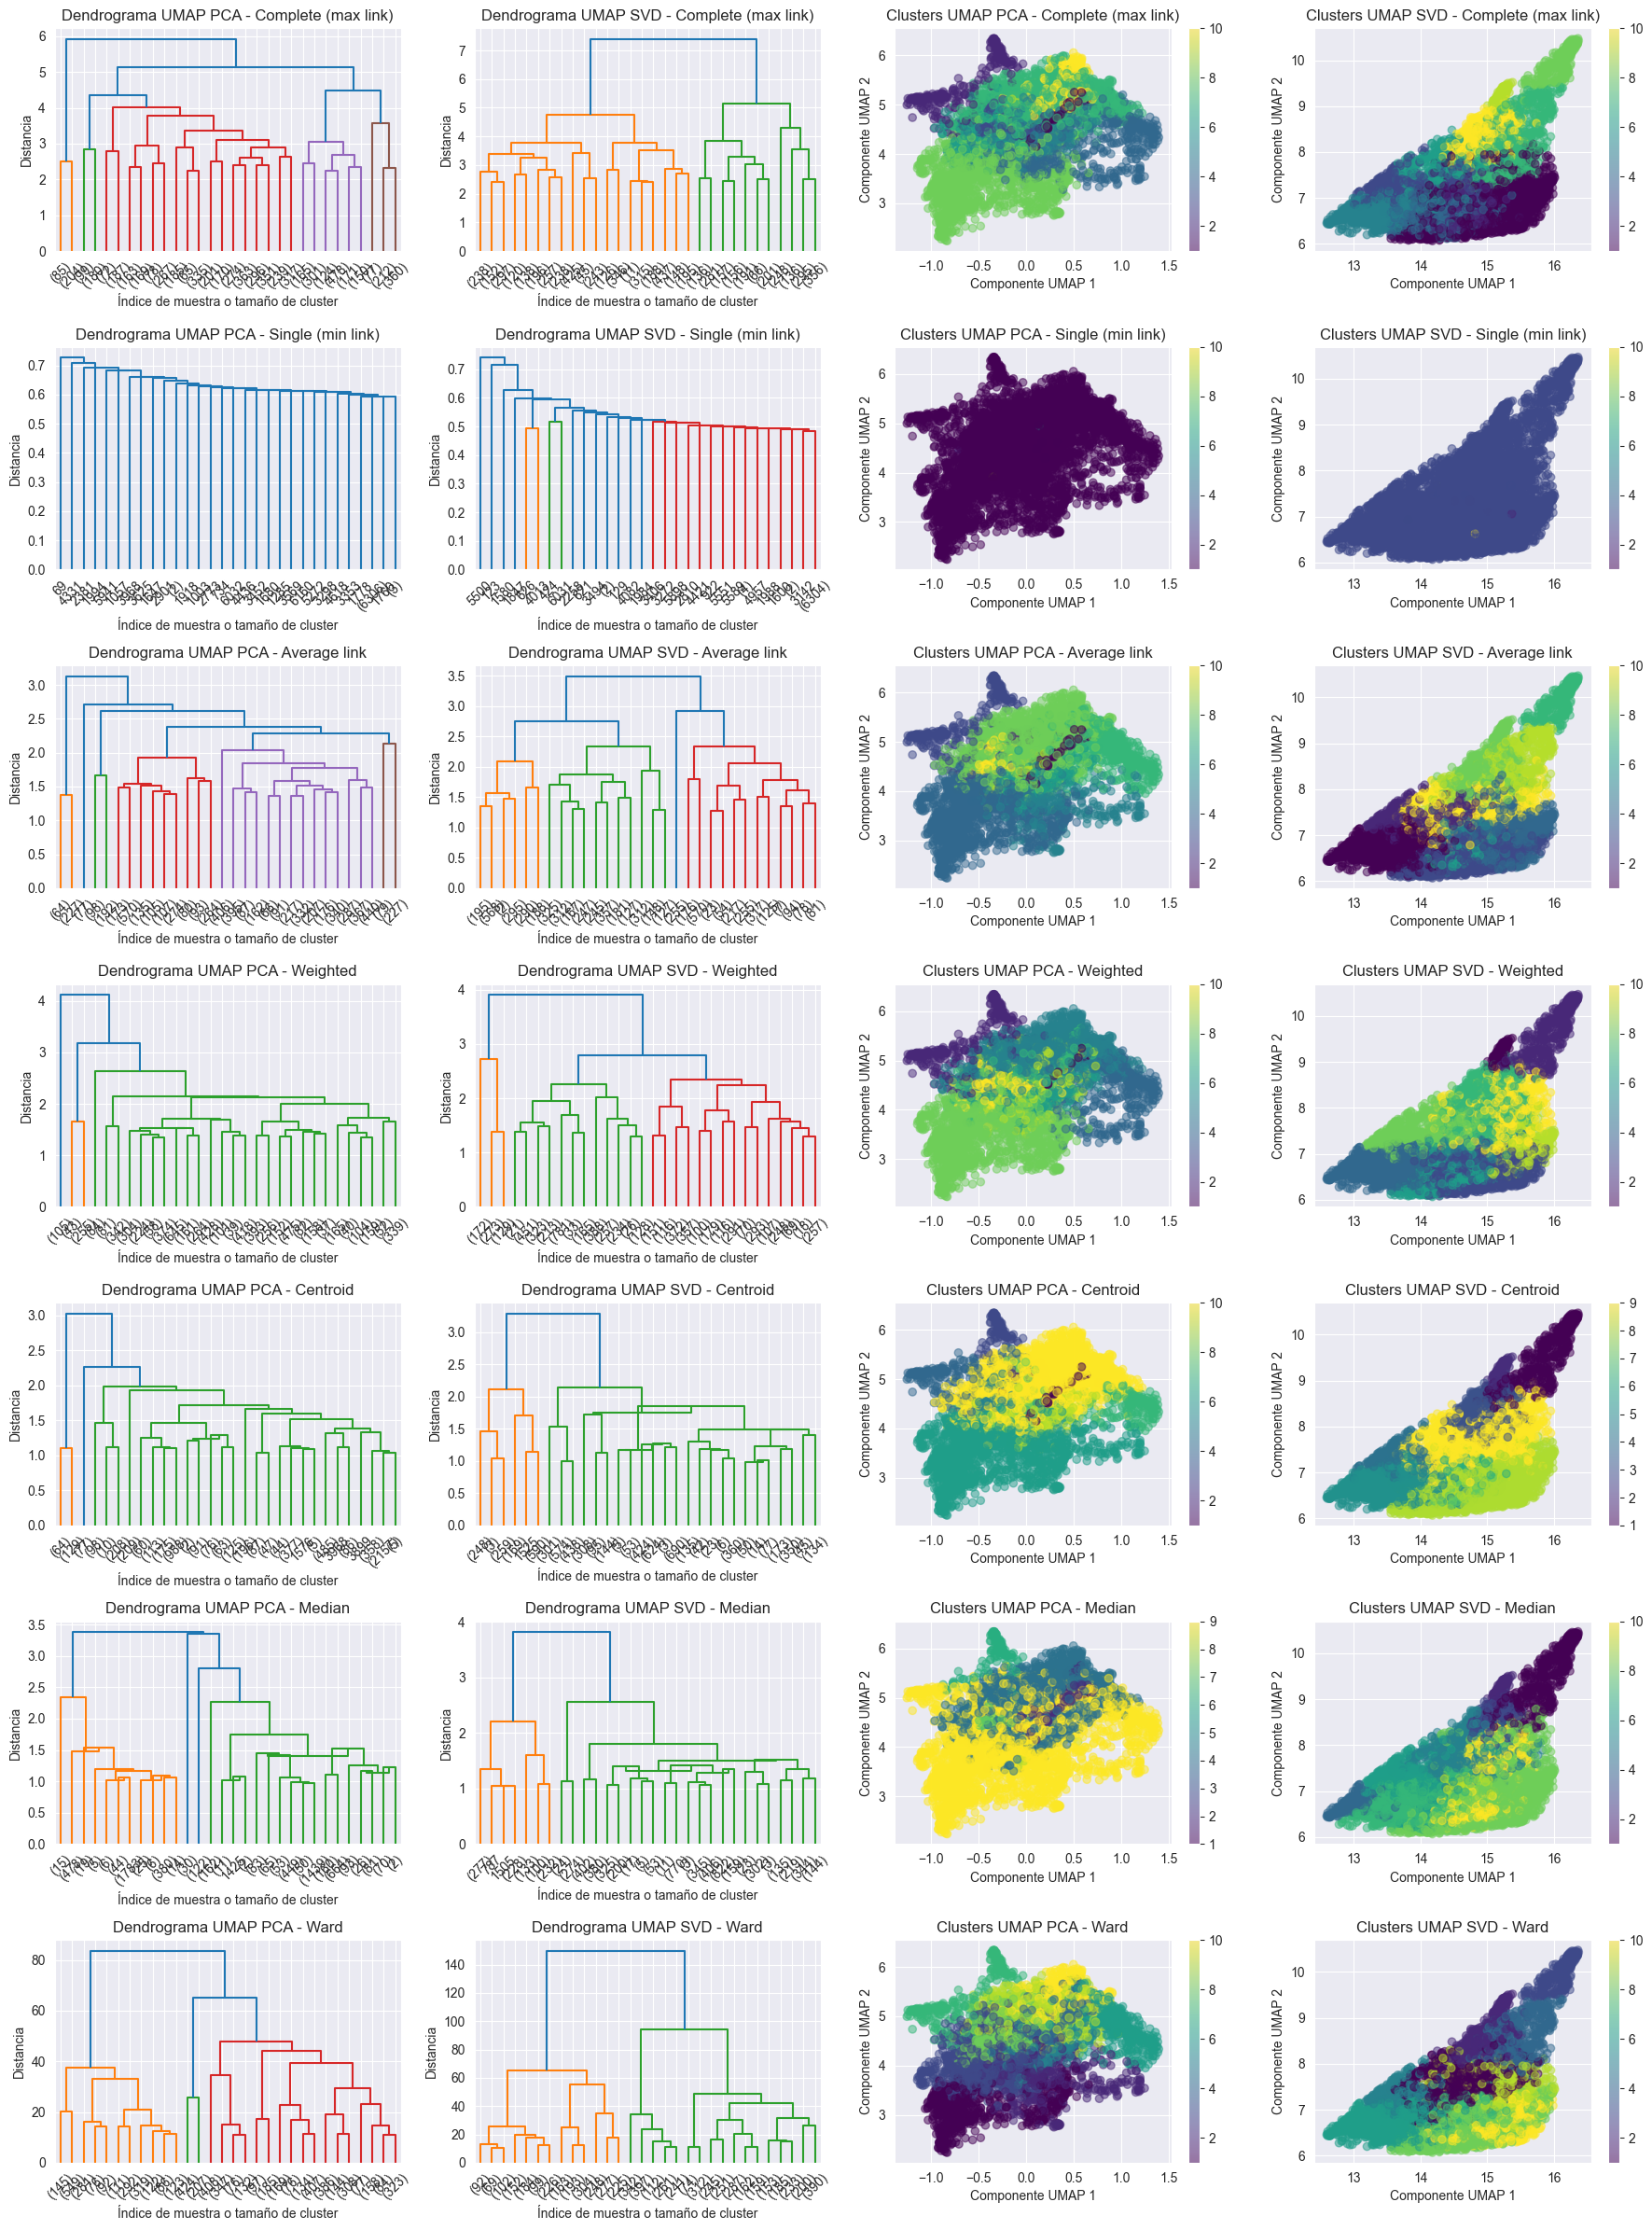

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Probar diferentes métodos de enlace
methods = ['complete', 'single', 'average', 'weighted', 'centroid', 'median', 'ward']
method_names = ['Complete (max link)', 'Single (min link)', 'Average link', 'Weighted', 'Centroid', 'Median', 'Ward']

# Crear figura para todos los métodos
fig = plt.figure(figsize=(18, 24))

for idx, (method, name) in enumerate(zip(methods, method_names)):
    # Clustering jerárquico para UMAP de PCA
    linkage_umap_pca = linkage(X_umap_pca, method=method, metric='euclidean')
    y_hierarchical_umap_pca = fcluster(linkage_umap_pca, t=10, criterion='maxclust')

    # Clustering jerárquico para UMAP de SVD
    linkage_umap_svd = linkage(X_umap_svd, method=method, metric='euclidean')
    y_hierarchical_umap_svd = fcluster(linkage_umap_svd, t=10, criterion='maxclust')

    # Calcular coeficiente de Silhouette
    silhouette_hierarchical_umap_pca = silhouette_score(X_umap_pca, y_hierarchical_umap_pca)
    silhouette_hierarchical_umap_svd = silhouette_score(X_umap_svd, y_hierarchical_umap_svd)

    # Calcular Calinski-Harabasz
    calinski_hierarchical_umap_pca = calinski_harabasz_score(X_umap_pca, y_hierarchical_umap_pca)
    calinski_hierarchical_umap_svd = calinski_harabasz_score(X_umap_svd, y_hierarchical_umap_svd)

    # Calcular Davies-Bouldin
    davies_bouldin_umap_pca = davies_bouldin_score(X_umap_pca, y_hierarchical_umap_pca)
    davies_bouldin_umap_svd = davies_bouldin_score(X_umap_svd, y_hierarchical_umap_svd)

    # Dendrograma UMAP de PCA
    plt.subplot(7, 4, idx * 4 + 1)
    dendrogram(linkage_umap_pca, truncate_mode='lastp', p=30)
    plt.title(f'Dendrograma UMAP PCA - {name}')
    plt.xlabel('Índice de muestra o tamaño de cluster')
    plt.ylabel('Distancia')

    # Dendrograma UMAP de SVD
    plt.subplot(7, 4, idx * 4 + 2)
    dendrogram(linkage_umap_svd, truncate_mode='lastp', p=30)
    plt.title(f'Dendrograma UMAP SVD - {name}')
    plt.xlabel('Índice de muestra o tamaño de cluster')
    plt.ylabel('Distancia')

    # Clusters UMAP de PCA
    plt.subplot(7, 4, idx * 4 + 3)
    plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=y_hierarchical_umap_pca, cmap='viridis', alpha=0.5)
    plt.title(f'Clusters UMAP PCA - {name}')
    plt.xlabel('Componente UMAP 1')
    plt.ylabel('Componente UMAP 2')
    plt.colorbar()

    # Clusters UMAP de SVD
    plt.subplot(7, 4, idx * 4 + 4)
    plt.scatter(X_umap_svd[:, 0], X_umap_svd[:, 1], c=y_hierarchical_umap_svd, cmap='viridis', alpha=0.5)
    plt.title(f'Clusters UMAP SVD - {name}')
    plt.xlabel('Componente UMAP 1')
    plt.ylabel('Componente UMAP 2')
    plt.colorbar()

    print(f"\n{name}:")
    print(f"UMAP PCA - Número de clusters: {len(set(y_hierarchical_umap_pca))}")
    print(f"UMAP PCA - Coeficiente de Silhouette: {silhouette_hierarchical_umap_pca:.4f}")
    print(f"UMAP PCA - Calinski-Harabasz: {calinski_hierarchical_umap_pca:.4f}")
    print(f"UMAP PCA - Davies-Bouldin: {davies_bouldin_umap_pca:.4f}")
    print(f"UMAP SVD - Número de clusters: {len(set(y_hierarchical_umap_svd))}")
    print(f"UMAP SVD - Coeficiente de Silhouette: {silhouette_hierarchical_umap_svd:.4f}")
    print(f"UMAP SVD - Calinski-Harabasz: {calinski_hierarchical_umap_svd:.4f}")
    print(f"UMAP SVD - Davies-Bouldin: {davies_bouldin_umap_svd:.4f}")

plt.tight_layout()
plt.show()


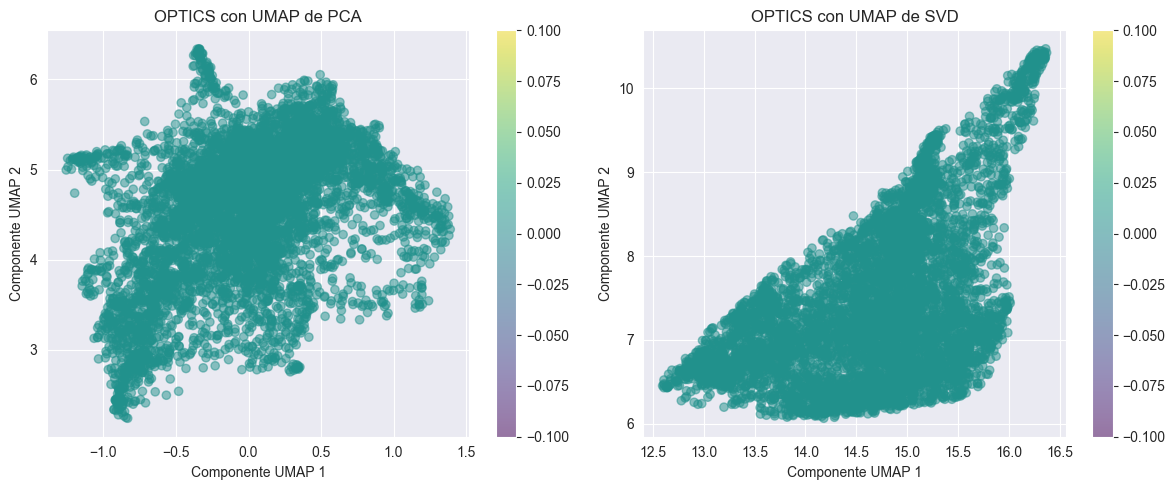

OPTICS (UMAP de PCA) - Número de clusters: 1
OPTICS (UMAP de PCA) - Puntos de ruido: 0
OPTICS (UMAP de PCA) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)

OPTICS (UMAP de SVD) - Número de clusters: 1
OPTICS (UMAP de SVD) - Puntos de ruido: 0
OPTICS (UMAP de SVD) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)


In [9]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Aplicar OPTICS a UMAP de PCA
optics_umap_pca = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
y_optics_umap_pca = optics_umap_pca.fit_predict(X_umap_pca)

# Aplicar OPTICS a UMAP de SVD
optics_umap_svd = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
y_optics_umap_svd = optics_umap_svd.fit_predict(X_umap_svd)

# Calcular número de clusters y ruido
n_clusters_optics_umap_pca = len(set(y_optics_umap_pca)) - (1 if -1 in y_optics_umap_pca else 0)
n_noise_optics_umap_pca = list(y_optics_umap_pca).count(-1)

n_clusters_optics_umap_svd = len(set(y_optics_umap_svd)) - (1 if -1 in y_optics_umap_svd else 0)
n_noise_optics_umap_svd = list(y_optics_umap_svd).count(-1)

# Calcular coeficiente de Silhouette (solo si hay más de 1 cluster)
if n_clusters_optics_umap_pca > 1:
    silhouette_optics_umap_pca = silhouette_score(X_umap_pca, y_optics_umap_pca)
else:
    silhouette_optics_umap_pca = None

if n_clusters_optics_umap_svd > 1:
    silhouette_optics_umap_svd = silhouette_score(X_umap_svd, y_optics_umap_svd)
else:
    silhouette_optics_umap_svd = None

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=y_optics_umap_pca, cmap='viridis', alpha=0.5)
plt.title('OPTICS con UMAP de PCA')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_umap_svd[:, 0], X_umap_svd[:, 1], c=y_optics_umap_svd, cmap='viridis', alpha=0.5)
plt.title('OPTICS con UMAP de SVD')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"OPTICS (UMAP de PCA) - Número de clusters: {n_clusters_optics_umap_pca}")
print(f"OPTICS (UMAP de PCA) - Puntos de ruido: {n_noise_optics_umap_pca}")
if silhouette_optics_umap_pca is not None:
    print(f"OPTICS (UMAP de PCA) - Coeficiente de Silhouette: {silhouette_optics_umap_pca:.4f}")
else:
    print("OPTICS (UMAP de PCA) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)")

print(f"\nOPTICS (UMAP de SVD) - Número de clusters: {n_clusters_optics_umap_svd}")
print(f"OPTICS (UMAP de SVD) - Puntos de ruido: {n_noise_optics_umap_svd}")
if silhouette_optics_umap_svd is not None:
    print(f"OPTICS (UMAP de SVD) - Coeficiente de Silhouette: {silhouette_optics_umap_svd:.4f}")
else:
    print("OPTICS (UMAP de SVD) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)")


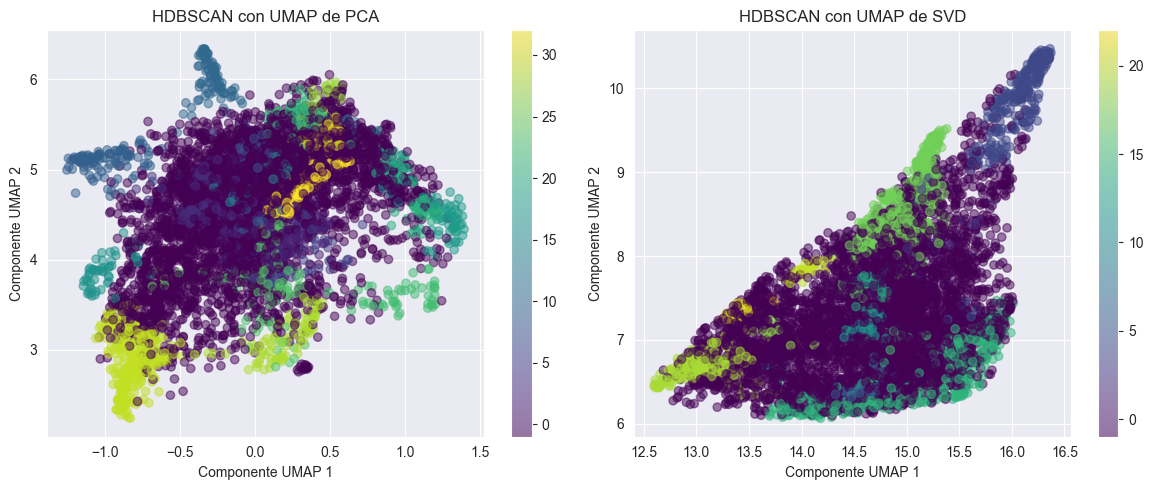

HDBSCAN (UMAP de PCA) - Número de clusters: 33
HDBSCAN (UMAP de PCA) - Puntos de ruido: 4074
HDBSCAN (UMAP de PCA) - Coeficiente de Silhouette: -0.1369

HDBSCAN (UMAP de SVD) - Número de clusters: 23
HDBSCAN (UMAP de SVD) - Puntos de ruido: 4392
HDBSCAN (UMAP de SVD) - Coeficiente de Silhouette: -0.3210


In [10]:
from sklearn.cluster import HDBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Aplicar HDBSCAN a UMAP de PCA
hdbscan_umap_pca = HDBSCAN(min_cluster_size=5, min_samples=25)
y_hdbscan_umap_pca = hdbscan_umap_pca.fit_predict(X_umap_pca)

# Aplicar HDBSCAN a UMAP de SVD
hdbscan_umap_svd = HDBSCAN(min_cluster_size=5, min_samples=25)
y_hdbscan_umap_svd = hdbscan_umap_svd.fit_predict(X_umap_svd)

# Calcular número de clusters y ruido
n_clusters_hdbscan_umap_pca = len(set(y_hdbscan_umap_pca)) - (1 if -1 in y_hdbscan_umap_pca else 0)
n_noise_hdbscan_umap_pca = list(y_hdbscan_umap_pca).count(-1)

n_clusters_hdbscan_umap_svd = len(set(y_hdbscan_umap_svd)) - (1 if -1 in y_hdbscan_umap_svd else 0)
n_noise_hdbscan_umap_svd = list(y_hdbscan_umap_svd).count(-1)

# Calcular coeficiente de Silhouette (solo si hay más de 1 cluster)
if n_clusters_hdbscan_umap_pca > 1:
    silhouette_hdbscan_umap_pca = silhouette_score(X_umap_pca, y_hdbscan_umap_pca)
else:
    silhouette_hdbscan_umap_pca = None

if n_clusters_hdbscan_umap_svd > 1:
    silhouette_hdbscan_umap_svd = silhouette_score(X_umap_svd, y_hdbscan_umap_svd)
else:
    silhouette_hdbscan_umap_svd = None

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=y_hdbscan_umap_pca, cmap='viridis', alpha=0.5)
plt.title('HDBSCAN con UMAP de PCA')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_umap_svd[:, 0], X_umap_svd[:, 1], c=y_hdbscan_umap_svd, cmap='viridis', alpha=0.5)
plt.title('HDBSCAN con UMAP de SVD')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"HDBSCAN (UMAP de PCA) - Número de clusters: {n_clusters_hdbscan_umap_pca}")
print(f"HDBSCAN (UMAP de PCA) - Puntos de ruido: {n_noise_hdbscan_umap_pca}")
if silhouette_hdbscan_umap_pca is not None:
    print(f"HDBSCAN (UMAP de PCA) - Coeficiente de Silhouette: {silhouette_hdbscan_umap_pca:.4f}")
else:
    print("HDBSCAN (UMAP de PCA) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)")

print(f"\nHDBSCAN (UMAP de SVD) - Número de clusters: {n_clusters_hdbscan_umap_svd}")
print(f"HDBSCAN (UMAP de SVD) - Puntos de ruido: {n_noise_hdbscan_umap_svd}")
if silhouette_hdbscan_umap_svd is not None:
    print(f"HDBSCAN (UMAP de SVD) - Coeficiente de Silhouette: {silhouette_hdbscan_umap_svd:.4f}")
else:
    print("HDBSCAN (UMAP de SVD) - Coeficiente de Silhouette: No calculable (menos de 2 clusters)")


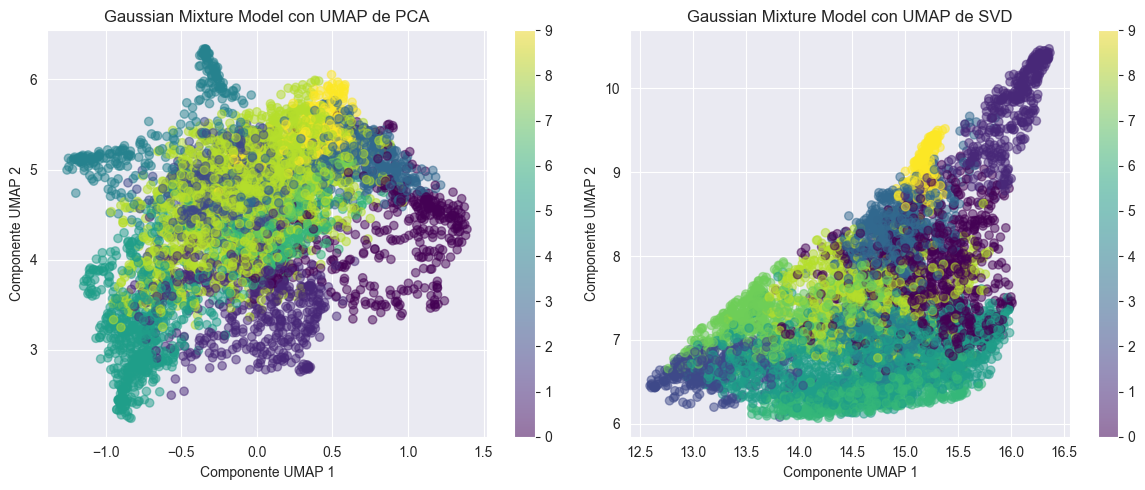

GMM (UMAP de PCA) - Número de componentes: 10
GMM (UMAP de PCA) - BIC: 2211.27
GMM (UMAP de PCA) - AIC: -2239.83
GMM (UMAP de PCA) - Coeficiente de Silhouette: 0.1687
GMM (UMAP de PCA) - Calinski-Harabasz: 1021.4392
GMM (UMAP de PCA) - Davies-Bouldin: 1.5203

GMM (UMAP de SVD) - Número de componentes: 10
GMM (UMAP de SVD) - BIC: -174516.89
GMM (UMAP de SVD) - AIC: -178967.98
GMM (UMAP de SVD) - Coeficiente de Silhouette: 0.1807
GMM (UMAP de SVD) - Calinski-Harabasz: 2020.0159
GMM (UMAP de SVD) - Davies-Bouldin: 1.2386


In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Aplicar Gaussian Mixture Model (GMM) a UMAP de PCA
gmm_umap_pca = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
y_gmm_umap_pca = gmm_umap_pca.fit_predict(X_umap_pca)

# Aplicar Gaussian Mixture Model (GMM) a UMAP de SVD
gmm_umap_svd = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
y_gmm_umap_svd = gmm_umap_svd.fit_predict(X_umap_svd)

# Calcular métricas
silhouette_gmm_umap_pca = silhouette_score(X_umap_pca, y_gmm_umap_pca)
silhouette_gmm_umap_svd = silhouette_score(X_umap_svd, y_gmm_umap_svd)

calinski_gmm_umap_pca = calinski_harabasz_score(X_umap_pca, y_gmm_umap_pca)
calinski_gmm_umap_svd = calinski_harabasz_score(X_umap_svd, y_gmm_umap_svd)

davies_bouldin_gmm_umap_pca = davies_bouldin_score(X_umap_pca, y_gmm_umap_pca)
davies_bouldin_gmm_umap_svd = davies_bouldin_score(X_umap_svd, y_gmm_umap_svd)

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=y_gmm_umap_pca, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model con UMAP de PCA')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_umap_svd[:, 0], X_umap_svd[:, 1], c=y_gmm_umap_svd, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model con UMAP de SVD')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"GMM (UMAP de PCA) - Número de componentes: {gmm_umap_pca.n_components}")
print(f"GMM (UMAP de PCA) - BIC: {gmm_umap_pca.bic(X_umap_pca):.2f}")
print(f"GMM (UMAP de PCA) - AIC: {gmm_umap_pca.aic(X_umap_pca):.2f}")
print(f"GMM (UMAP de PCA) - Coeficiente de Silhouette: {silhouette_gmm_umap_pca:.4f}")
print(f"GMM (UMAP de PCA) - Calinski-Harabasz: {calinski_gmm_umap_pca:.4f}")
print(f"GMM (UMAP de PCA) - Davies-Bouldin: {davies_bouldin_gmm_umap_pca:.4f}")

print(f"\nGMM (UMAP de SVD) - Número de componentes: {gmm_umap_svd.n_components}")
print(f"GMM (UMAP de SVD) - BIC: {gmm_umap_svd.bic(X_umap_svd):.2f}")
print(f"GMM (UMAP de SVD) - AIC: {gmm_umap_svd.aic(X_umap_svd):.2f}")
print(f"GMM (UMAP de SVD) - Coeficiente de Silhouette: {silhouette_gmm_umap_svd:.4f}")
print(f"GMM (UMAP de SVD) - Calinski-Harabasz: {calinski_gmm_umap_svd:.4f}")
print(f"GMM (UMAP de SVD) - Davies-Bouldin: {davies_bouldin_gmm_umap_svd:.4f}")


In [14]:
import pandas as pd

# Leer el archivo movies_train.csv
movies_train = pd.read_csv('LDA_UMAP_DBSCAN/movies_train.csv')

# Crear DataFrame para clusters de KMeans con PCA
df_kmeans_pca = pd.DataFrame({
    'movieId': image_ids.astype(int),
    'cluster_kmeans_pca': y_kmeans_umap_pca
})

# Crear DataFrame para clusters de KMeans con SVD
df_kmeans_svd = pd.DataFrame({
    'movieId': image_ids.astype(int),
    'cluster_kmeans_svd': y_kmeans_umap_svd
})

# Obtener clusters jerárquicos con average link
from scipy.cluster.hierarchy import linkage, fcluster

# Average link para UMAP de PCA
linkage_avg_pca = linkage(X_umap_pca, method='average', metric='euclidean')
y_hierarchical_avg_pca = fcluster(linkage_avg_pca, t=10, criterion='maxclust')

# Average link para UMAP de SVD
linkage_avg_svd = linkage(X_umap_svd, method='average', metric='euclidean')
y_hierarchical_avg_svd = fcluster(linkage_avg_svd, t=10, criterion='maxclust')

# Crear DataFrame para clusters jerárquicos average link con PCA
df_hierarchical_avg_pca = pd.DataFrame({
    'movieId': image_ids.astype(int),
    'cluster_hierarchical_avg_pca': y_hierarchical_avg_pca
})

# Crear DataFrame para clusters jerárquicos average link con SVD
df_hierarchical_avg_svd = pd.DataFrame({
    'movieId': image_ids.astype(int),
    'cluster_hierarchical_avg_svd': y_hierarchical_avg_svd
})

# Unir con movies_train
movies_train_pca = movies_train.merge(df_kmeans_pca, on='movieId', how='left')
movies_train_svd = movies_train.merge(df_kmeans_svd, on='movieId', how='left')
movies_train_hierarchical_avg_pca = movies_train.merge(df_hierarchical_avg_pca, on='movieId', how='left')
movies_train_hierarchical_avg_svd = movies_train.merge(df_hierarchical_avg_svd, on='movieId', how='left')

print(f"Shape movies_train_pca: {movies_train_pca.shape}")
print(f"Shape movies_train_svd: {movies_train_svd.shape}")
print(f"Shape movies_train_hierarchical_avg_pca: {movies_train_hierarchical_avg_pca.shape}")
print(f"Shape movies_train_hierarchical_avg_svd: {movies_train_hierarchical_avg_svd.shape}")
print("\nPrimeras filas movies_train_hierarchical_avg_pca:")
movies_train_hierarchical_avg_pca


Shape movies_train_pca: (6821, 24)
Shape movies_train_svd: (6821, 24)
Shape movies_train_hierarchical_avg_pca: (6821, 24)
Shape movies_train_hierarchical_avg_svd: (6821, 24)

Primeras filas movies_train_hierarchical_avg_pca:


movieId                                             title  \
0         619                                         Ed (1996)   
1       33826                                Saint Ralph (2004)   
2        1298                       Pink Floyd: The Wall (1982)   
3      140289                              Men & Chicken (2015)   
4        3064                  Poison Ivy: New Seduction (1997)   
...       ...                                               ...   
6816     8983  House of Flying Daggers (Shi mian mai fu) (2004)   
6817     1131                           Jean de Florette (1986)   
6818    74683      movies_freq = movies['title'].value_counts()   
6819       17                      Sense and Sensibility (1995)   
6820    74683      movies_freq = movies['title'].value_counts()   

                    genres  (no genres listed)  Action  Adventure  Animation  \
0                   Comedy                   0       0          0          0   
1             Comedy|Drama                   0       0          0          0   
2            Drama|Musical                   0       0          0          0   
3             Comedy|Drama                   0       0          0          0   
4           Drama|Thriller                   0       0          0          0   
...                    ...                 ...     ...        ...        ...   
6816  Action|Drama|Romance                   0       1          0          0   
6817         Drama|Mystery                   0       0          0          0   
6818                Comedy                   0       0          0          0   
6819         Drama|Romance                   0       0          0          0   
6820                Comedy                   0       0          0          0   

      Children  Comedy  Crime  ...  Horror  IMAX  Musical  Mystery  Romance  \
0            0       1      0  ...       0     0        0        0        0   
1            0       1      0  ...       0     0        0        0        0   
2            0       0      0  ...       0     0        1        0        0   
3            0       1      0  ...       0     0        0        0        0   
4            0       0      0  ...       0     0        0        0        0   
...        ...     ...    ...  ...     ...   ...      ...      ...      ...   
6816         0       0      0  ...       0     0        0        0        1   
6817         0       0      0  ...       0     0        0        1        0   
6818         0       1      0  ...       0     0        0        0        0   
6819         0       0      0  ...       0     0        0        0        1   
6820         0       1      0  ...       0     0        0        0        0   

      Sci-Fi  Thriller  War  Western  cluster_hierarchical_avg_pca  
0          0         0    0        0                           8.0  
1          0         0    0        0                           4.0  
2          0         0    0        0                           8.0  
3          0         0    0        0                           8.0  
4          0         1    0        0                           8.0  
...      ...       ...  ...      ...                           ...  
6816       0         0    0        0                           7.0  
6817       0         0    0        0                           8.0  
6818       0         0    0        0                           4.0  
6819       0         0    0        0                           7.0  
6820       0         0    0        0                           4.0  

[6821 rows x 24 columns]

In [15]:
import pandas as pd

# Obtener las columnas de géneros (excluyendo las columnas no relacionadas con géneros)
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

print("=" * 80)
print("ANÁLISIS DE PORCENTAJES DE GÉNEROS POR CLUSTER")
print("=" * 80)

# Análisis para KMeans con PCA
print("\n" + "=" * 80)
print("1. KMEANS CON PCA")
print("=" * 80)
for cluster in sorted(movies_train_pca['cluster_kmeans_pca'].unique()):
    cluster_data = movies_train_pca[movies_train_pca['cluster_kmeans_pca'] == cluster]
    print(f"\n--- Cluster {cluster} (n={len(cluster_data)}) ---")
    genre_percentages = (cluster_data[genre_columns].sum() / len(cluster_data) * 100).sort_values(ascending=False)
    for genre, percentage in genre_percentages.items():
        if percentage > 0:
            print(f"  {genre}: {percentage:.2f}%")

# Análisis para KMeans con SVD
print("\n" + "=" * 80)
print("2. KMEANS CON SVD")
print("=" * 80)
for cluster in sorted(movies_train_svd['cluster_kmeans_svd'].unique()):
    cluster_data = movies_train_svd[movies_train_svd['cluster_kmeans_svd'] == cluster]
    print(f"\n--- Cluster {cluster} (n={len(cluster_data)}) ---")
    genre_percentages = (cluster_data[genre_columns].sum() / len(cluster_data) * 100).sort_values(ascending=False)
    for genre, percentage in genre_percentages.items():
        if percentage > 0:
            print(f"  {genre}: {percentage:.2f}%")

# Análisis para Jerárquico Average Link con PCA
print("\n" + "=" * 80)
print("3. JERÁRQUICO AVERAGE LINK CON PCA")
print("=" * 80)
for cluster in sorted(movies_train_hierarchical_avg_pca['cluster_hierarchical_avg_pca'].unique()):
    cluster_data = movies_train_hierarchical_avg_pca[
        movies_train_hierarchical_avg_pca['cluster_hierarchical_avg_pca'] == cluster]
    print(f"\n--- Cluster {cluster} (n={len(cluster_data)}) ---")
    genre_percentages = (cluster_data[genre_columns].sum() / len(cluster_data) * 100).sort_values(ascending=False)
    for genre, percentage in genre_percentages.items():
        if percentage > 0:
            print(f"  {genre}: {percentage:.2f}%")

# Análisis para Jerárquico Average Link con SVD
print("\n" + "=" * 80)
print("4. JERÁRQUICO AVERAGE LINK CON SVD")
print("=" * 80)
for cluster in sorted(movies_train_hierarchical_avg_svd['cluster_hierarchical_avg_svd'].unique()):
    cluster_data = movies_train_hierarchical_avg_svd[
        movies_train_hierarchical_avg_svd['cluster_hierarchical_avg_svd'] == cluster]
    print(f"\n--- Cluster {cluster} (n={len(cluster_data)}) ---")
    genre_percentages = (cluster_data[genre_columns].sum() / len(cluster_data) * 100).sort_values(ascending=False)
    for genre, percentage in genre_percentages.items():
        if percentage > 0:
            print(f"  {genre}: {percentage:.2f}%")


ANÁLISIS DE PORCENTAJES DE GÉNEROS POR CLUSTER

1. KMEANS CON PCA

--- Cluster 0.0 (n=1302) ---
  Drama: 43.78%
  Comedy: 31.57%
  Action: 25.12%
  Thriller: 22.58%
  Adventure: 18.97%
  Romance: 14.21%
  Sci-Fi: 13.75%
  Crime: 11.60%
  Fantasy: 11.44%
  Horror: 10.60%
  Children: 8.60%
  Animation: 8.22%
  Mystery: 6.68%
  Documentary: 4.38%
  War: 3.92%
  IMAX: 3.84%
  Musical: 3.69%
  Western: 1.69%
  Film-Noir: 0.69%

--- Cluster 1.0 (n=703) ---
  Drama: 44.52%
  Comedy: 43.39%
  Romance: 19.35%
  Action: 14.79%
  Crime: 14.65%
  Thriller: 13.80%
  Adventure: 10.67%
  Horror: 7.11%
  Musical: 6.26%
  Sci-Fi: 5.97%
  Documentary: 5.97%
  Children: 5.26%
  Fantasy: 5.12%
  Mystery: 4.84%
  War: 4.41%
  Animation: 2.42%
  Western: 2.28%
  Film-Noir: 1.99%
  IMAX: 0.14%

--- Cluster 2.0 (n=308) ---
  Drama: 49.68%
  Comedy: 36.69%
  Thriller: 20.13%
  Action: 18.51%
  Horror: 12.99%
  Crime: 12.66%
  Adventure: 12.01%
  Sci-Fi: 10.06%
  Romance: 10.06%
  Children: 7.47%
  Fantasy: 7.4

NÚMERO TOTAL DE PELÍCULAS POR GÉNERO
Drama          :  3059 películas
Comedy         :  2660 películas
Thriller       :  1298 películas
Action         :  1279 películas
Romance        :  1139 películas
Adventure      :   895 películas
Crime          :   833 películas
Sci-Fi         :   668 películas
Horror         :   665 películas
Fantasy        :   554 películas
Children       :   468 películas
Animation      :   421 películas
Mystery        :   406 películas
Documentary    :   321 películas
War            :   251 películas
Musical        :   234 películas
Western        :   112 películas
IMAX           :   106 películas
Film-Noir      :    67 películas


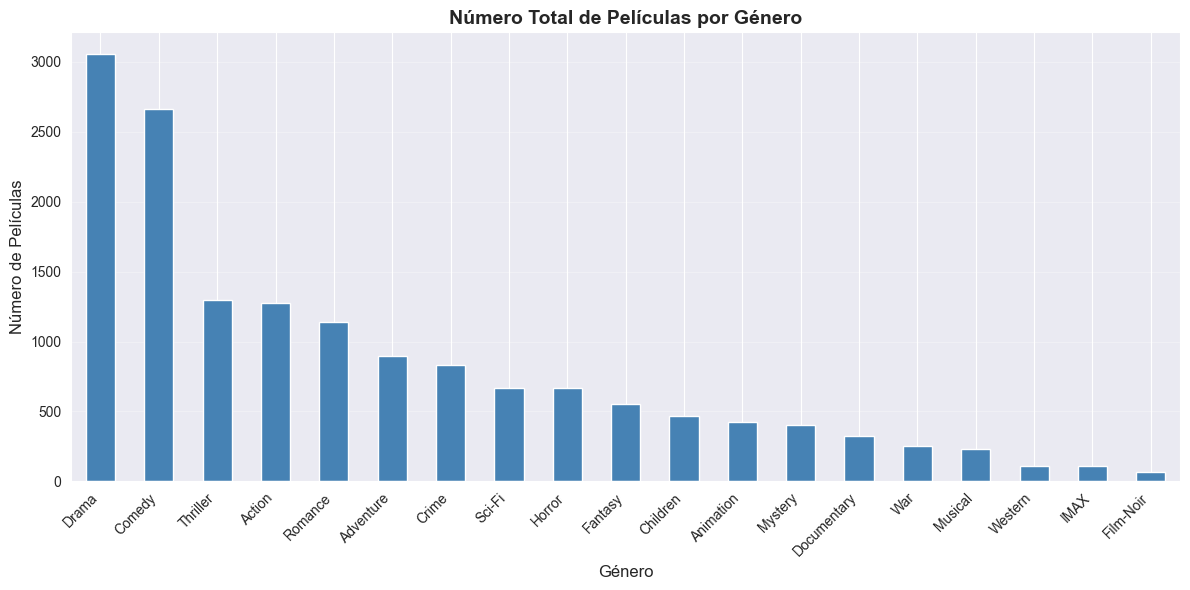


ANÁLISIS DE ASOCIACIÓN GÉNERO-CLUSTER
Modelo: Jerárquico Average Link con PCA


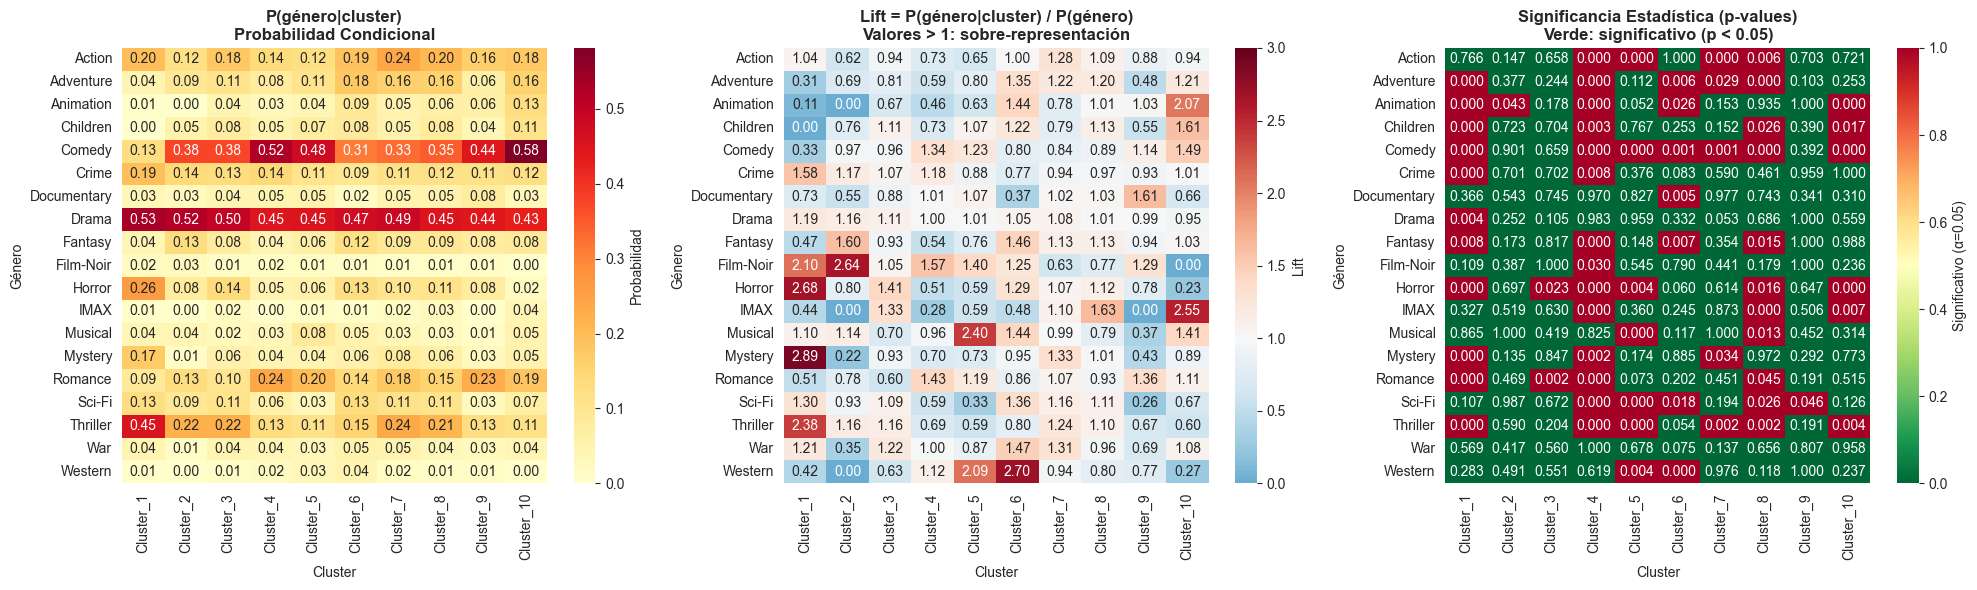


RESUMEN ESTADÍSTICO

Probabilidad global de géneros (baseline):
Drama          0.448468
Comedy         0.389972
Thriller       0.190295
Action         0.187509
Romance        0.166984
Adventure      0.131212
Crime          0.122123
Sci-Fi         0.097933
Horror         0.097493
Fantasy        0.081220
Children       0.068612
Animation      0.061721
Mystery        0.059522
Documentary    0.047061
War            0.036798
Musical        0.034306
Western        0.016420
IMAX           0.015540
Film-Noir      0.009823

TOP 5 ASOCIACIONES MÁS FUERTES (Mayor Lift)
Mystery         - Cluster_1   : Lift=2.89, P(g|c)=17.18%, p=0.0000 ***
Western         - Cluster_6   : Lift=2.70, P(g|c)=4.43%, p=0.0000 ***
Horror          - Cluster_1   : Lift=2.68, P(g|c)=26.12%, p=0.0000 ***
Film-Noir       - Cluster_2   : Lift=2.64, P(g|c)=2.60%, p=0.3875 ns
IMAX            - Cluster_10  : Lift=2.55, P(g|c)=3.96%, p=0.0067 **
Musical         - Cluster_5   : Lift=2.40, P(g|c)=8.24%, p=0.0000 ***
Thriller      

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Obtener las columnas de géneros
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calcular el número total de películas por género
total_por_genero = movies_train_hierarchical_avg_pca[genre_columns].sum().sort_values(ascending=False)

print("=" * 80)
print("NÚMERO TOTAL DE PELÍCULAS POR GÉNERO")
print("=" * 80)
for genero, total in total_por_genero.items():
    print(f"{genero:15s}: {int(total):5d} películas")

# Visualizar en gráfico de barras
plt.figure(figsize=(12, 6))
total_por_genero.plot(kind='bar', color='steelblue')
plt.title('Número Total de Películas por Género', fontsize=14, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Función para calcular métricas de asociación género-cluster
def analizar_genero_cluster(df, cluster_col):
    """
    Calcula probabilidades condicionales, lift y significancia para géneros por cluster
    """
    # 1. P(género|cluster) - Probabilidad condicional
    prob_genero_dado_cluster = pd.DataFrame()

    for cluster in sorted(df[cluster_col].dropna().unique()):
        cluster_data = df[df[cluster_col] == cluster]
        prob = (cluster_data[genre_columns].sum() / len(cluster_data))
        prob_genero_dado_cluster[f'Cluster_{int(cluster)}'] = prob

    # 2. P(género) - Probabilidad marginal (baseline)
    prob_genero_global = df[genre_columns].sum() / len(df)

    # 3. Lift = P(género|cluster) / P(género)
    lift = prob_genero_dado_cluster.div(prob_genero_global, axis=0)

    # 4. Test de significancia (Chi-cuadrado) para cada género
    significancia = pd.DataFrame(index=genre_columns,
                                 columns=[f'Cluster_{int(c)}' for c in sorted(df[cluster_col].dropna().unique())])

    for genre in genre_columns:
        for cluster in sorted(df[cluster_col].dropna().unique()):
            # Tabla de contingencia 2x2
            cluster_mask = df[cluster_col] == cluster

            a = df[cluster_mask & (df[genre] == 1)].shape[0]  # género=1, cluster=sí
            b = df[cluster_mask & (df[genre] == 0)].shape[0]  # género=0, cluster=sí
            c = df[~cluster_mask & (df[genre] == 1)].shape[0]  # género=1, cluster=no
            d = df[~cluster_mask & (df[genre] == 0)].shape[0]  # género=0, cluster=no

            contingency = np.array([[a, b], [c, d]])
            chi2, p_value, _, _ = stats.chi2_contingency(contingency)

            significancia.loc[genre, f'Cluster_{int(cluster)}'] = p_value

    return prob_genero_dado_cluster, lift, significancia, prob_genero_global


# Análisis para Jerárquico Average Link con PCA (el mejor modelo según Silhouette)
print("\n" + "=" * 80)
print("ANÁLISIS DE ASOCIACIÓN GÉNERO-CLUSTER")
print("Modelo: Jerárquico Average Link con PCA")
print("=" * 80)

prob_cond, lift_matrix, pvalues, prob_global = analizar_genero_cluster(
    movies_train_hierarchical_avg_pca,
    'cluster_hierarchical_avg_pca'
)

# Visualización 1: Heatmap de P(género|cluster)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Heatmap 1: Probabilidades condicionales
sns.heatmap(prob_cond, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Probabilidad'})
axes[0].set_title('P(género|cluster)\nProbabilidad Condicional', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Género')

# Heatmap 2: Lift
sns.heatmap(lift_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=1, ax=axes[1],
            cbar_kws={'label': 'Lift'}, vmin=0, vmax=3)
axes[1].set_title('Lift = P(género|cluster) / P(género)\nValores > 1: sobre-representación',
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Género')

# Heatmap 3: Significancia (p-values)
# Convertir p-values a formato numérico y marcar significancia
pvalues_num = pvalues.astype(float)
sns.heatmap(pvalues_num < 0.05, annot=pvalues_num, fmt='.3f', cmap='RdYlGn_r',
            ax=axes[2], cbar_kws={'label': 'Significativo (α=0.05)'})
axes[2].set_title('Significancia Estadística (p-values)\nVerde: significativo (p < 0.05)',
                  fontsize=12, fontweight='bold')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Género')

plt.tight_layout()
plt.show()

# Resumen estadístico
print("\n" + "=" * 80)
print("RESUMEN ESTADÍSTICO")
print("=" * 80)
print(f"\nProbabilidad global de géneros (baseline):")
print(prob_global.sort_values(ascending=False).to_string())

print("\n" + "=" * 80)
print("TOP 5 ASOCIACIONES MÁS FUERTES (Mayor Lift)")
print("=" * 80)
lift_stack = lift_matrix.stack().sort_values(ascending=False).head(10)
for (genre, cluster), lift_val in lift_stack.items():
    prob = prob_cond.loc[genre, cluster]
    pval = pvalues.loc[genre, cluster]
    sig = "***" if float(pval) < 0.001 else "**" if float(pval) < 0.01 else "*" if float(pval) < 0.05 else "ns"
    print(f"{genre:15s} - {cluster:12s}: Lift={lift_val:.2f}, P(g|c)={prob:.2%}, p={float(pval):.4f} {sig}")


In [20]:
# Cargar el modelo exportado y verificar su contenido
import pickle

with open('best_clustering_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Modelo cargado exitosamente!")
print("\nComponentes del modelo:")
for key in loaded_model.keys():
    print(f"  - {key}")

print(f"\nNombre del modelo: {loaded_model['model_name']}")
print(f"Silhouette Score: {loaded_model['silhouette_score']:.4f}")
print(f"Número de clusters: {loaded_model['n_clusters']}")


Modelo cargado exitosamente!

Componentes del modelo:
  - scaler
  - pca
  - umap
  - linkage_matrix
  - n_clusters
  - cluster_labels
  - model_name
  - silhouette_score

Nombre del modelo: Hierarchical_Average_PCA
Silhouette Score: 0.2094
Número de clusters: 10
